In [1]:
# define the path of the data and project
data_path = 'D:/VScode/MRes/scienceweb.whoi.edu/itp/data/'

In [2]:
# read the cleaned xarray from local file
import xarray as xr
ds_cleaned=xr.open_dataset(f"{data_path}/ds_cleaned.nc")

In [3]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [10]:
ds_cleaned.info()

xarray.Dataset {
dimensions:
	nprof = 47890 ;
	pressure = 99 ;

variables:
	float64 temperature(nprof, pressure) ;
	float64 salinity(nprof, pressure) ;
	int32 profiler(nprof) ;
	datetime64[ns] date(nprof) ;
	float64 lon(nprof) ;
	float64 lat(nprof) ;
	float64 pressure(pressure) ;

// global attributes:
}

In [34]:
# calculate the mean profile and plot it
import plotly.graph_objs as go
from plotly.subplots import make_subplots

mean_temperature = ds_cleaned['temperature'].mean(dim='nprof')
lower_temperature = ds_cleaned['temperature'].quantile(q=0.05, dim='nprof')
upper_temperature = ds_cleaned['temperature'].quantile(q=0.95, dim='nprof')

mean_salinity = ds_cleaned['salinity'].mean(dim='nprof')
lower_salinity = ds_cleaned['salinity'].quantile(q=0.05, dim='nprof')
upper_salinity = ds_cleaned['salinity'].quantile(q=0.95, dim='nprof')

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=mean_temperature, y=ds_cleaned['pressure'], mode='lines', name='Mean', showlegend=True, line=dict(color='tomato')), row=1, col=1)
fig.add_trace(go.Scatter(x=lower_temperature, y=ds_cleaned['pressure'], mode='lines', name='5th Percentile', showlegend=True, line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=upper_temperature, y=ds_cleaned['pressure'], mode='lines', name='95th Percentile', showlegend=True, line=dict(color='blue')), row=1, col=1)
fig.update_xaxes(title_text='Temperature (°C)', row=1, col=1)
fig.update_yaxes(title_text='Pressure (dbar)', row=1, col=1)


fig.add_trace(go.Scatter(x=mean_salinity, y=ds_cleaned['pressure'], mode='lines', name='Mean', showlegend=False, line=dict(color='tomato')), row=1, col=2)
fig.add_trace(go.Scatter(x=lower_salinity, y=ds_cleaned['pressure'], mode='lines', name='5th Percentile', showlegend=False, line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=upper_salinity, y=ds_cleaned['pressure'], mode='lines', name='95th Percentile', showlegend=False, line=dict(color='blue')), row=1, col=2)
fig.update_xaxes(title_text='Salinity', row=1, col=2)
# fig.update_yaxes(title_text='Pressure (dbar)', row=1, col=2)
fig.update_layout(title='Mean Profile', title_x=0.45, width=800, height=700)

fig.show()


In [35]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 47890, pressure: 99)
Coordinates:
    profiler     (nprof) int32 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 -1.495 -1.495 -1.342 ... 0.422 0.4203
    salinity     (nprof, pressure) float64 27.8 27.81 28.08 ... 34.84 34.84

In [37]:
ds_cleaned.lon

<xarray.DataArray 'lon' (nprof: 47890)>
[47890 values with dtype=float64]
Coordinates:
    profiler  (nprof) int32 ...
    date      (nprof) datetime64[ns] ...
    lon       (nprof) float64 ...
    lat       (nprof) float64 ...
Dimensions without coordinates: nprof

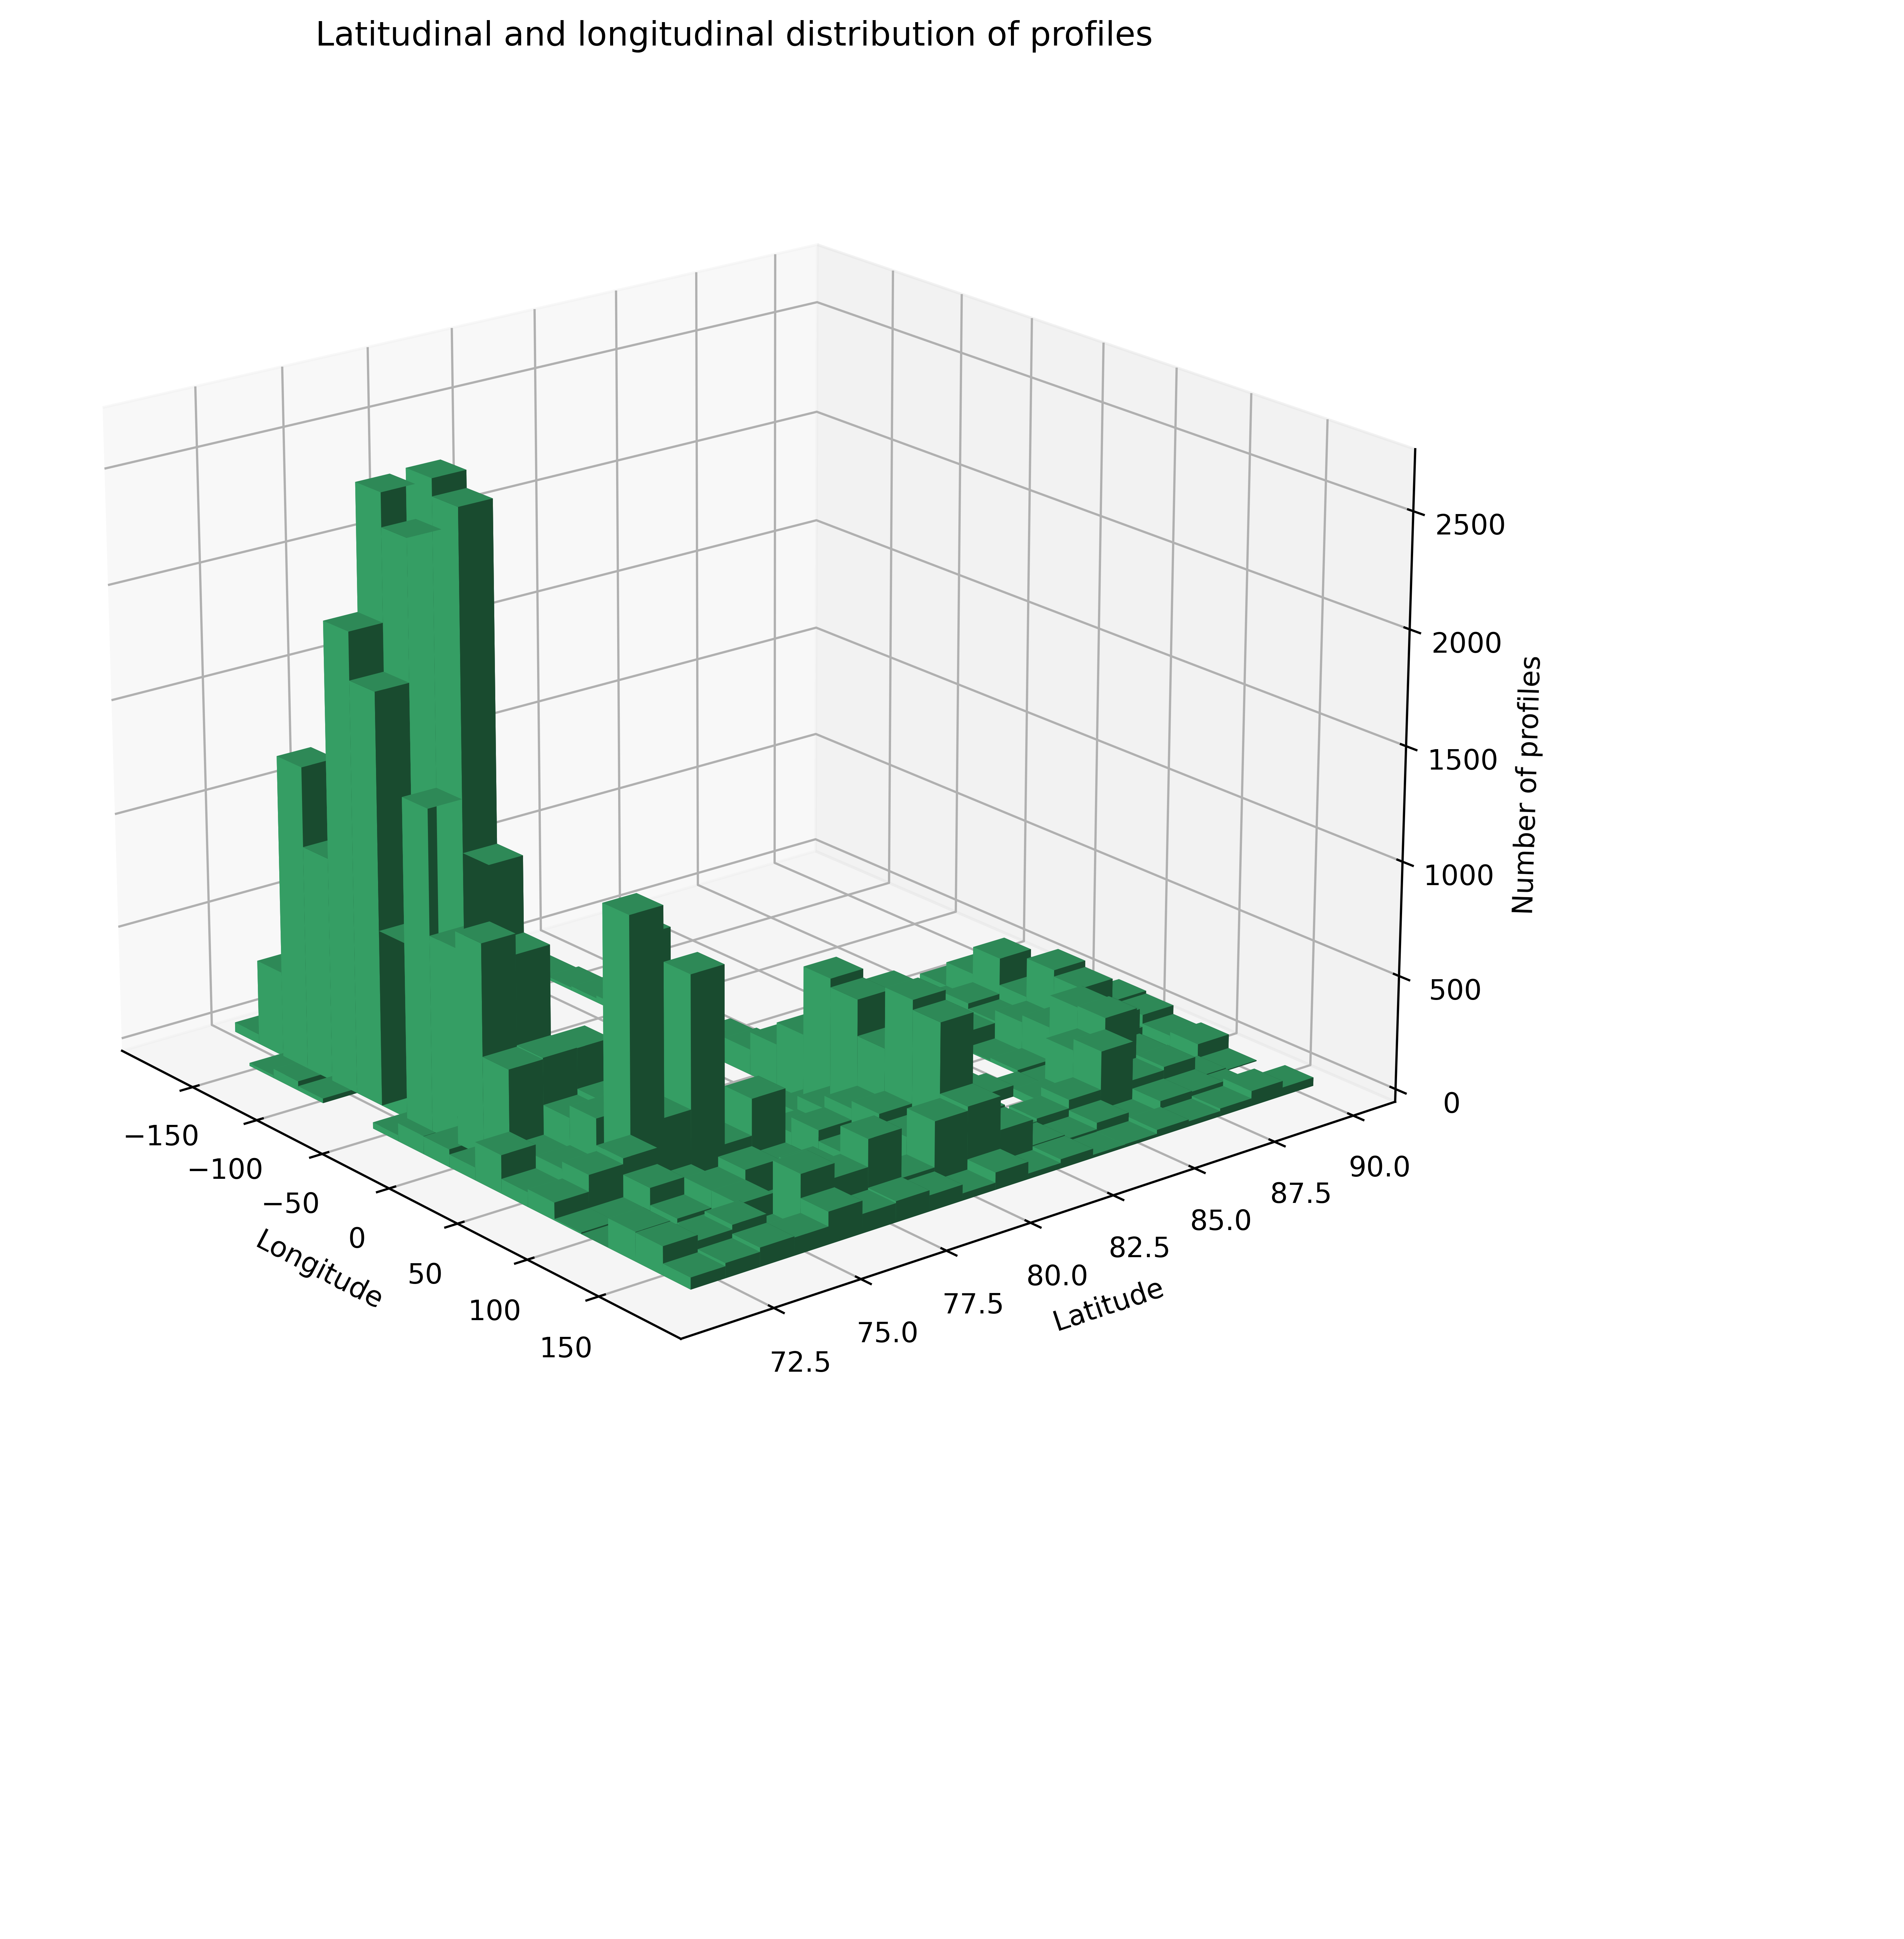

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



# define bin edges for longitude, latitude, and pressure
lon_bins = np.linspace(ds_cleaned.lon.min(), ds_cleaned.lon.max(), 20)
lat_bins = np.linspace(ds_cleaned.lat.min(), ds_cleaned.lat.max(), 20)

# use the number of profiles in each bin as the height
H, xedges, yedges = np.histogram2d(ds_cleaned.lon, ds_cleaned.lat, bins=[lon_bins, lat_bins])

# set up the figure and the 3D axes
fig = plt.figure(figsize=(12,12),dpi=600)
fig.subplots_adjust(wspace=2,hspace=2)

gs = gridspec.GridSpec(5, 5)
ax = plt.subplot(gs[0:4, 0:4], projection='3d')
# ax = fig.add_subplot(221, projection='3d')

# create X and Y grids
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

# create the bar plot, only for non-zero height values
colors = ['mediumseagreen' if h > 0 else 'none' for h in H.flatten()]
ax.view_init(elev=20, azim=-39)
ax.bar3d(X.flatten(), Y.flatten(), np.zeros(len(X.flatten())),
         dx=np.diff(xedges)[0], dy=np.diff(yedges)[0], dz=H.flatten(),
         color=colors, zsort='average')

# set the axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number of profiles')
ax.set_title('Latitudinal and longitudinal distribution of profiles')
ax = plt.subplot(gs[4, 4])
# ax=fig.add_subplot(122)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
# Remove box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# show the plot
plt.show()




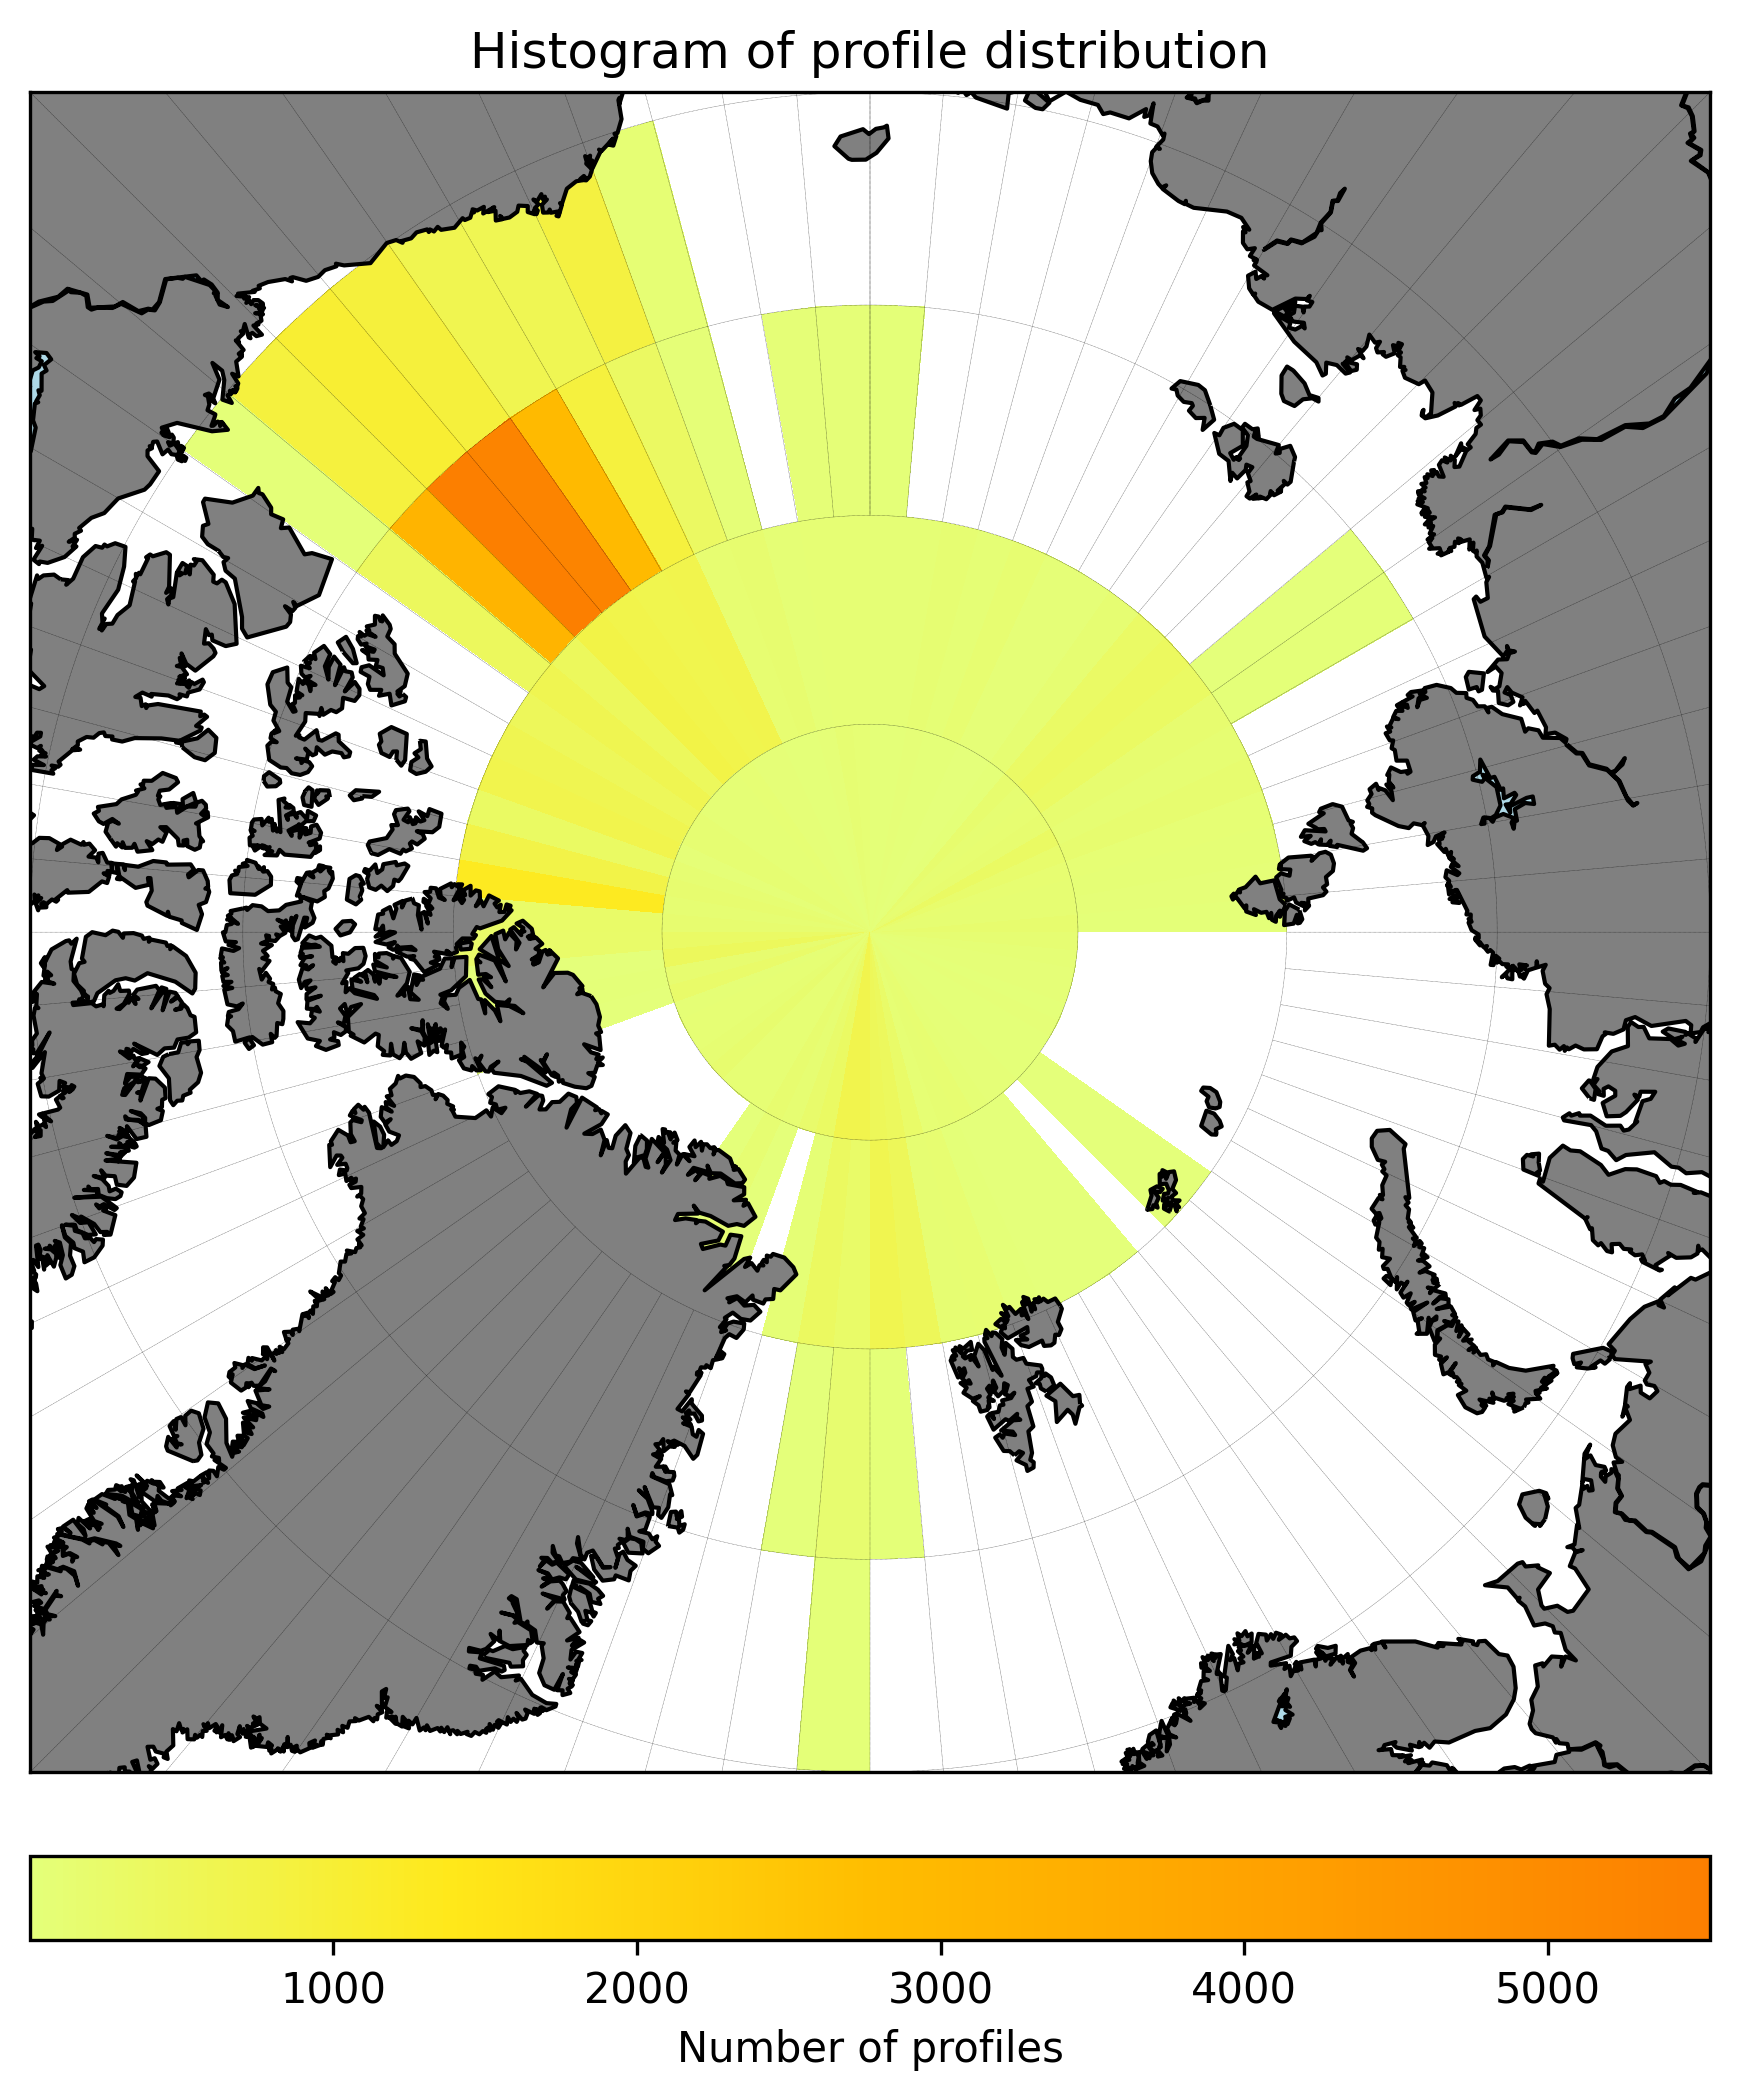

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the map bounds and resolution
lon_min, lon_max = -180, 180
lat_min, lat_max = 70, 90
latlon_step = 5
resolution = 'l'  # l for low resolution, h for high resolution

# Define bin edges for longitude, latitude, and pressure
lon_bins = np.arange(lon_min, lon_max+1, latlon_step)
lat_bins = np.arange(lat_min, lat_max+1, latlon_step)

# Use the number of profiles in each bin as the height
H, xedges, yedges = np.histogram2d(ds_cleaned.lon, ds_cleaned.lat, bins=[lon_bins, lat_bins])

# Set up the figure and the Basemap instance
fig = plt.figure(figsize=(8,8),dpi=300)
m = Basemap(projection='npstere', boundinglat=lat_min, lon_0=0, resolution=resolution)


m.drawparallels(np.arange(lat_min, lat_max+1, 5), labels=[], linewidth=0.1)
m.drawmeridians(np.arange(lon_min, lon_max+1, 5), labels=[], linewidth=0.1)


# Create the X and Y grids for the histogram
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])

new_col = np.arange(lat_min, lat_max, latlon_step)
Y = np.concatenate((Y, new_col[:, np.newaxis]), axis=1)

new_col = lon_max*np.ones(len(lat_bins)-1)
X = np.concatenate((X, new_col[:, np.newaxis]), axis=1)

new_row = X[-1]
X=np.vstack([X,new_row])

new_row = lat_max*np.ones(np.shape(Y)[1])
Y=np.vstack([Y,new_row])

# Create the colored grid using pcolormesh
cmap = plt.get_cmap('Wistia')
cmap.set_under(color='white', alpha=1.0)
cmap.set_over(color='white', alpha=1.0)



# levels = np.linspace(0, H.max(), 100)

# m.drawmapboundary(fill_color='aqua')

m.pcolormesh(X, Y, H.T, cmap=cmap, vmin=1, vmax=H.max(),latlon=True)

m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='lightblue')

# m.bluemarble()

# m.shadedrelief()

# Add a colorbar
cbar = m.colorbar(location='bottom', pad="5%")
cbar.set_label('Number of profiles')


# Set the axis labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# set the tick labels empty
plt.xticks([])
plt.yticks([])
plt.title('Histogram of profile distribution')


# Show the plot
plt.show()


In [204]:
# get the year and month from each date ds_cleaned.date 
years = ds_cleaned.date.dt.year.values
months = ds_cleaned.date.dt.month.values


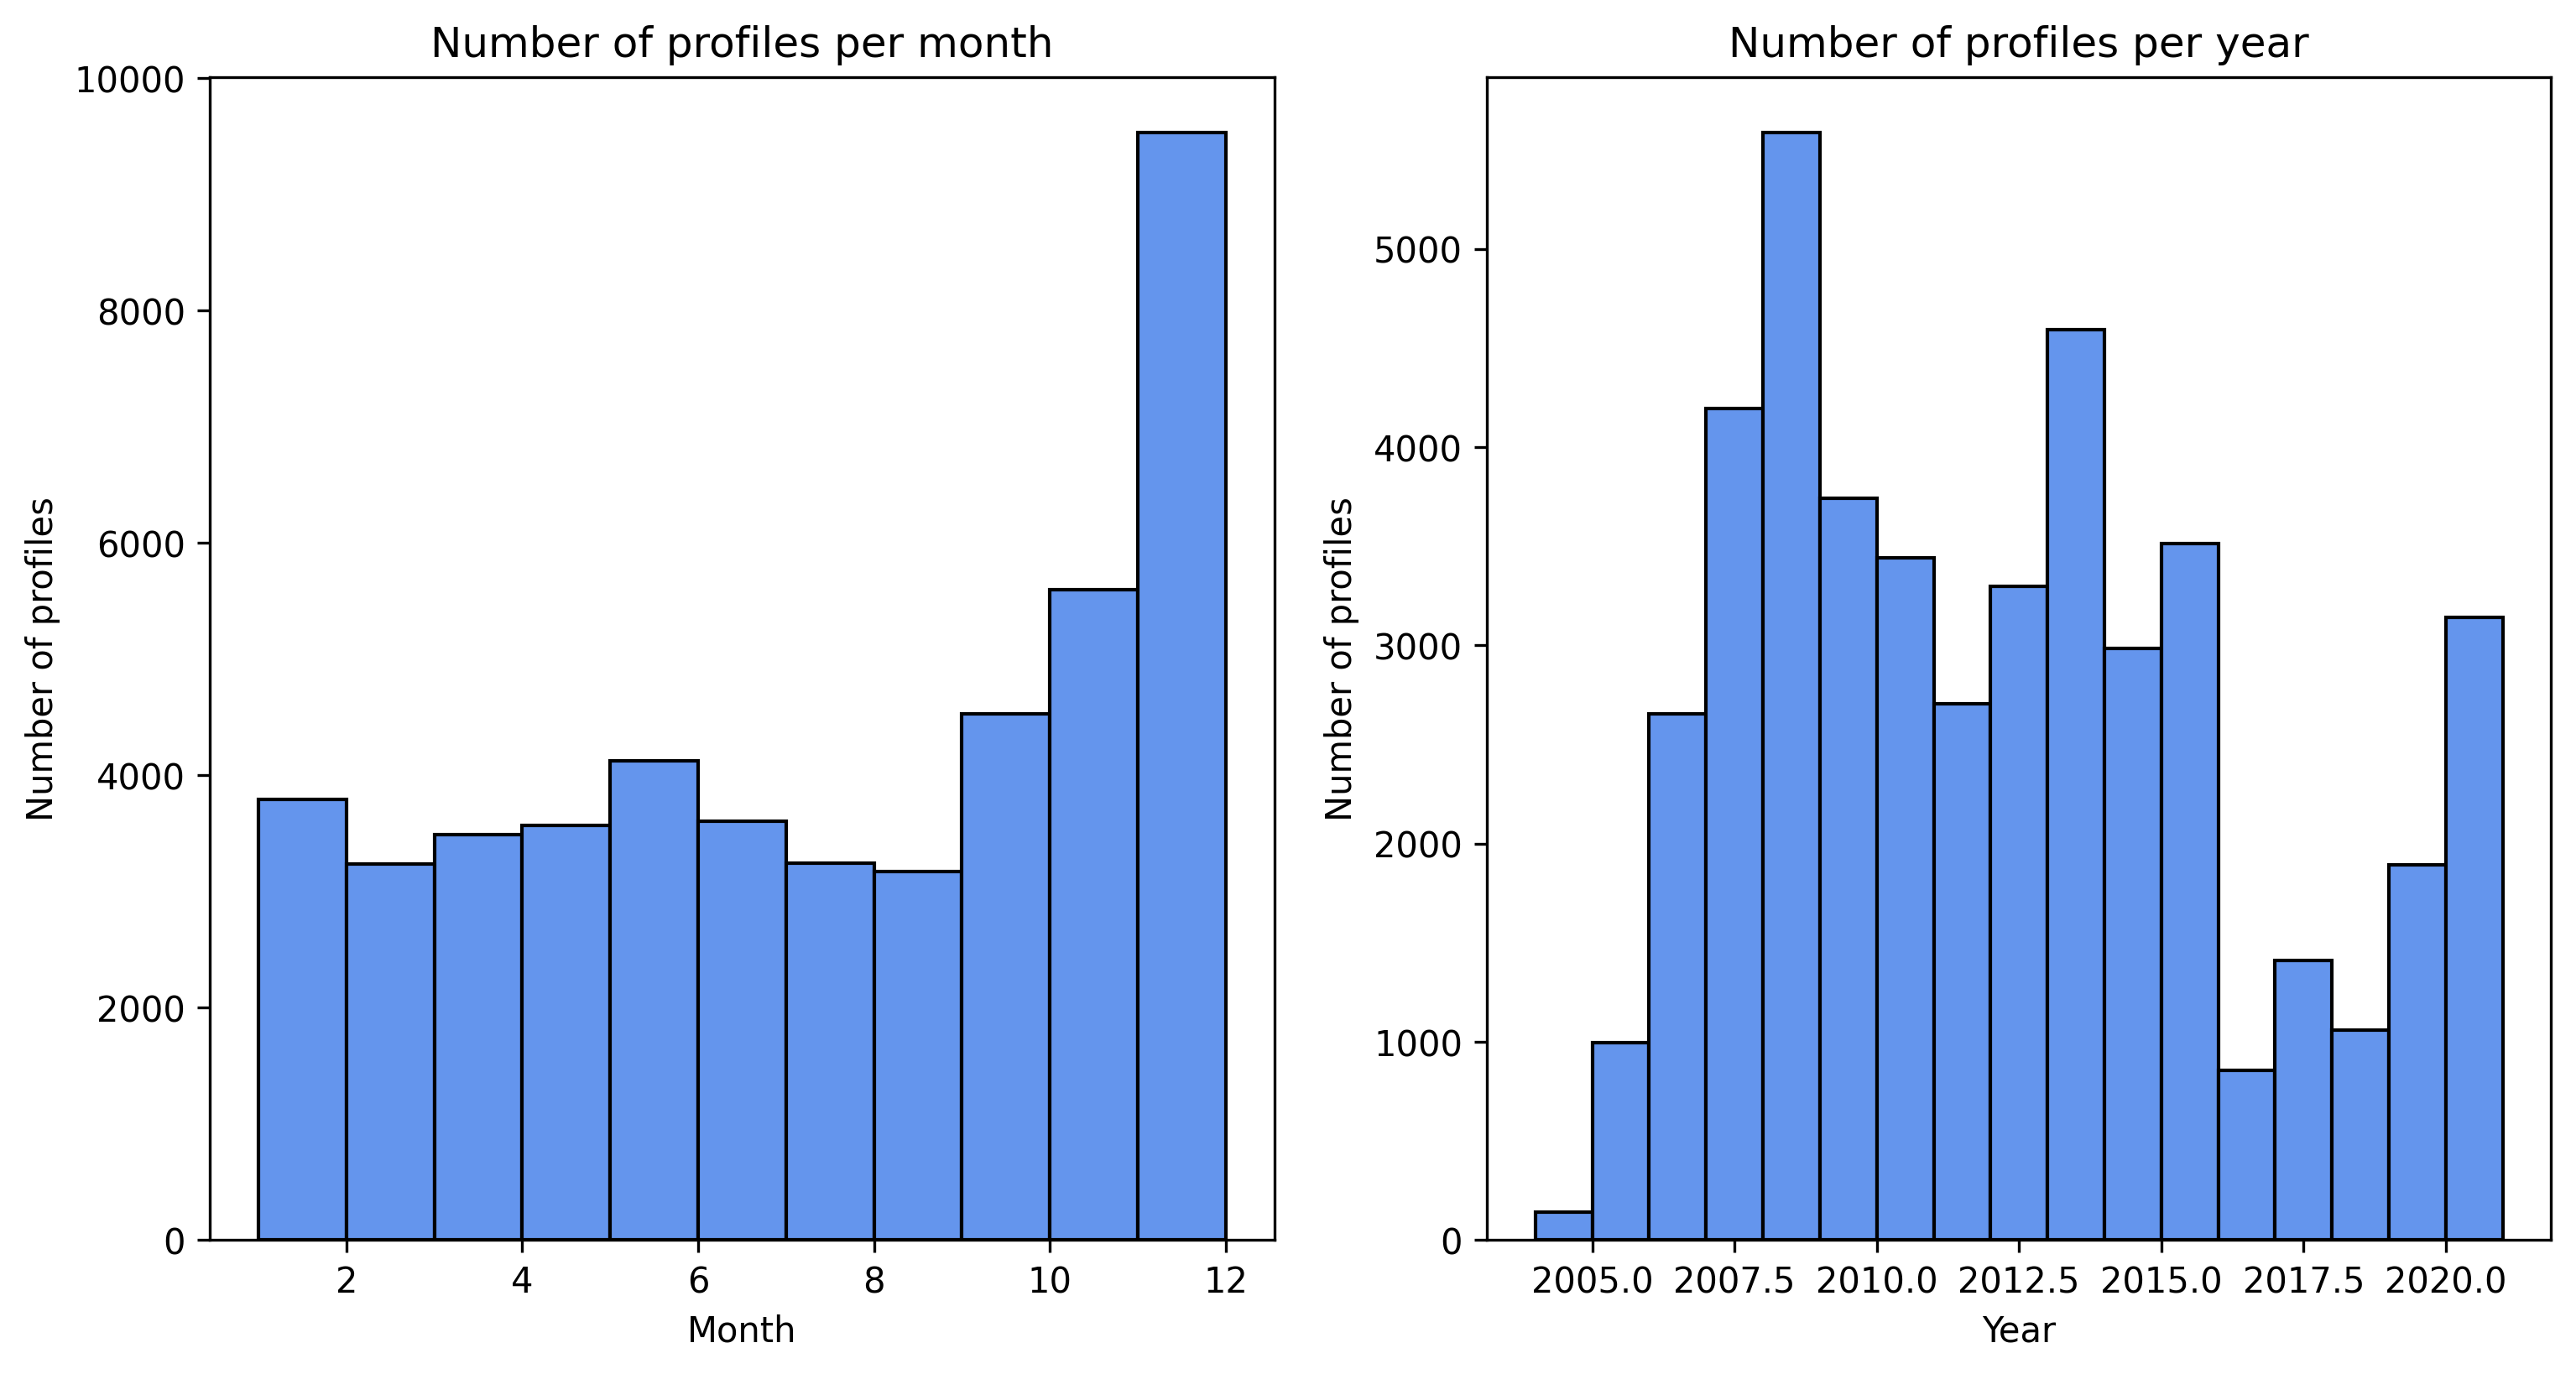

In [209]:
# plot a histogram of the number of profiles per month and a histogram of the number of profiles per year
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
ax[0].hist(months, bins=np.arange(1, 13), color='cornflowerblue',edgecolor='black', linewidth=1)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Number of profiles')
ax[0].set_title('Number of profiles per month')

ax[1].hist(years, bins=np.arange(np.min(years), np.max(years)), color='cornflowerblue',edgecolor='black', linewidth=1)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of profiles')
ax[1].set_title('Number of profiles per year')

plt.show()
